# Cross Validation and Simple Linear Regression

This is the process that gives us the internal and the cross-validation measures of <b> predictive accuracy </b>for a <b>simple linear regression</b>. The data are <b>randomly assigned</b> to a number of "folds", which in our context is the <b>test</b> and <b>training</b> folds. Each fold is removed, in turn, while the <b>remaining data</b> is used to <b>re-fit</b> the regression model and to <b>predict</b> at the <b>deleted observations.</b>

- We will predict employee salaries from different employee characteristics (or features). <br> 
- We are going to use a simple supervised learning technique: linear regression. 
- We want to build a simple model to determine how well Years Worked predicts an employee’s salary. Years Worked predicts an employee’s salary.

## 1. Importing

In [16]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import datasets, linear_model
from scipy.stats import iqr
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt

In [17]:
# Reading data into a dataframe
salary = pd.read_csv('salary.csv')
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


<h1><center>Type of data</center></h1> 

| Continuous | Categorical | Binary |
| --- | --- | --- |
| Salary | position | degree |
| exprior | field | otherqual |
| Yearsworked | - | male |
| market | - | - |
| yearsranked | - | -|
| yearsabs | - | - |

<h1><center>Feature description</center></h1> 

| Feature | Description |
| --- | --- |
| exprior | Years of experience prior to working in this field |
| Yearsworked | Years worked in this field |
| yearsrank | Years worked at current rank |
| market | Market value (1 = salary at market value for position, <br> <1 salary lower than market value for position,<br> >1 salary higher than market value for position) |
| degree | Has degree (0 = no 1= yes) |
| otherqual | Has other post-secondary qualification (0 = no, 1=yes) |
| position | Position (1 = Junior Employee 2=Manager 3= Executive) |
| male | 0 = no 1 1=yes |
| Field | Field of work (1 = Engineering 2=Finance 3=Human Resource 4=Marketing) |
| yearsabs |Years absent from work (e.g. due to illness / child rearing / personal reasons)|

<h1><center>Response description</center></h1> 

| Response | Description |
| --- | --- |
| <font color='black'> salary </font>| <font color='black'>  Annual salary in dollars </font> | 

## 2. Cleaning data
Data cleaning is the process of detecting and correcting corrupt or inaccurate data from a dataset, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.
### 2.1 Examining missing values

In [3]:
#Checking for missing values for our dataset

salary.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [4]:
#Filling the missing values with the average
salary = salary.fillna(salary['salary'].mean())
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


##### What we did with the missing values in the data

- We <b>filled</b> the missing value that appeared in the <b>salary</b> column with the <b>mean</b> of that column.

### 2.2 Examing duplicates within the dataset

In [5]:
#Dropping duplicates within the dataset
salary.drop_duplicates(inplace=True)

##### Dealing with duplicates within the dataset

We dropped any duplicates that may exist within the dataset

### 2.3 Examining outliers within the dataset
In statistics, an outlier is an observation point that is distant from other observations.


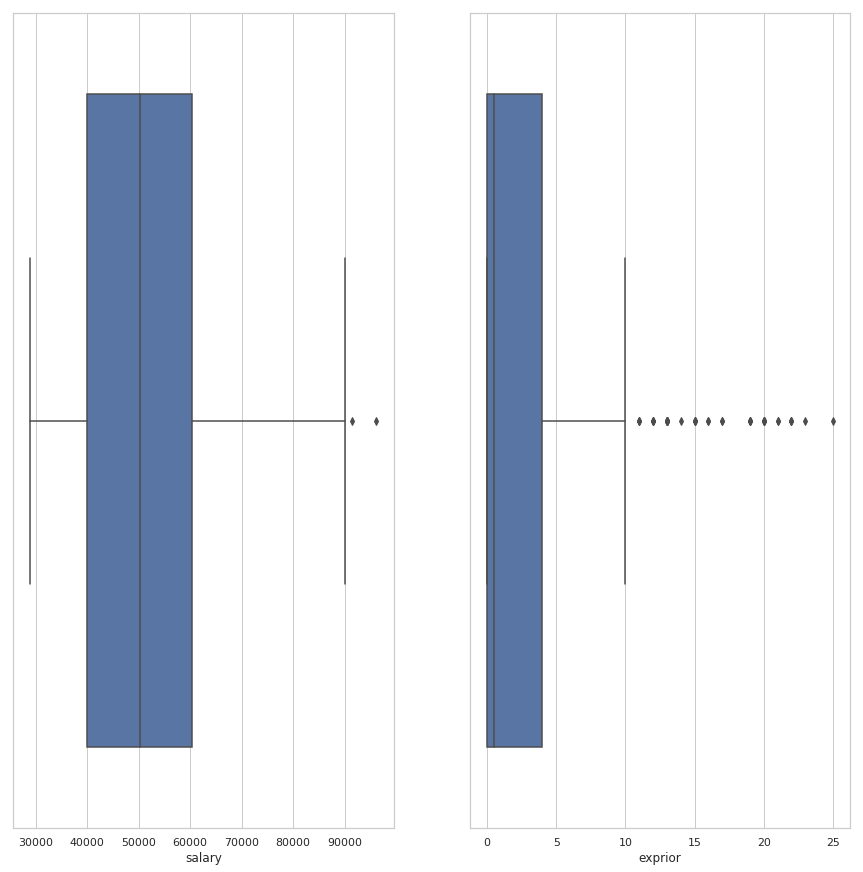

In [6]:
#Checking for extreme values
sns.set()
sns.set(style="whitegrid")
fig, axes = plt.subplots(1,2, figsize=(15, 15))
sns.boxplot(x=salary["salary"], ax=axes[0], data = salary)
sns.boxplot(x=salary["exprior"], ax=axes[1],data = salary)


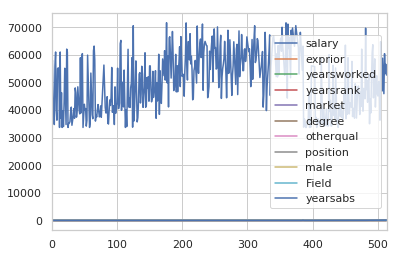

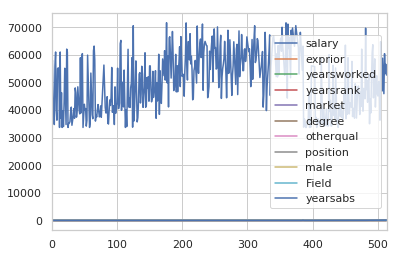

In [7]:
#Removing the outliers
removed_outliers = salary['salary'].between(salary['salary'].quantile(.05), salary['salary'].quantile(.95))

salary[removed_outliers].plot().get_figure()

##### Outliers

We have observed <b> two outliers</b> for the salary values, and <b>none</b> for the yearsworked values.

how we intend on dealing with the outliers is to remove them, as they may....

## 3. Spliting data
These are two rather important concepts in data science and data analysis and are used as tools to prevent (or at least minimize) overfitting. We usually fit the model on a training set in order to make predications on a data that wasn’t trained (general data)

In [26]:
#Split our data
x = salary[['exprior','yearsworked','yearsrank','market','degree','otherqual','position', 'male','Field','yearsabs']]
y = salary['salary']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
y_train = pd.DataFrame(y_train)

### 3.1 Viewing the split data

In [10]:
#showcasing the first 5 observations of the X_train dataset 
X_train.head()


,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
243,0,28,7,0.91,1,0,3,1,1,1
89,0,8,3,0.99,1,0,2,1,3,1
10,0,3,3,1.23,1,0,1,1,1,1
238,0,29,15,1.22,1,0,3,1,3,0
447,2,8,2,0.99,0,0,2,0,4,24


In [11]:
#showcasing the first 5 observations of the y_train dataset 
y_train.head()

,salary
243,54686.0
89,43641.0
10,55227.0
238,63231.0
447,38818.0


In [12]:
#Describing the dataset of y_train
y_train.describe()


,salary
count,411.000000
mean,50954.896217
std,12864.037613
min,29000.000000
25%,40356.000000
50%,49826.000000
75%,60171.500000
max,96156.000000


Talk about the distribution:
mean
median
interquartile

### Describing the datasets
 - The training dataset contains <b> 80% of the overall dataset </b> and has been divided into two datasets the <b>feautures dataset </b> and the <b>response variable dataset</b>
 - talk about the <b>mean</b>, <b>median</b> and the <b>mode</b>
 

## 4. Distribution of the data
The distribution of a statistical data set (or a population) is a listing or function showing all the possible values (or intervals) of the data and how often they occur.

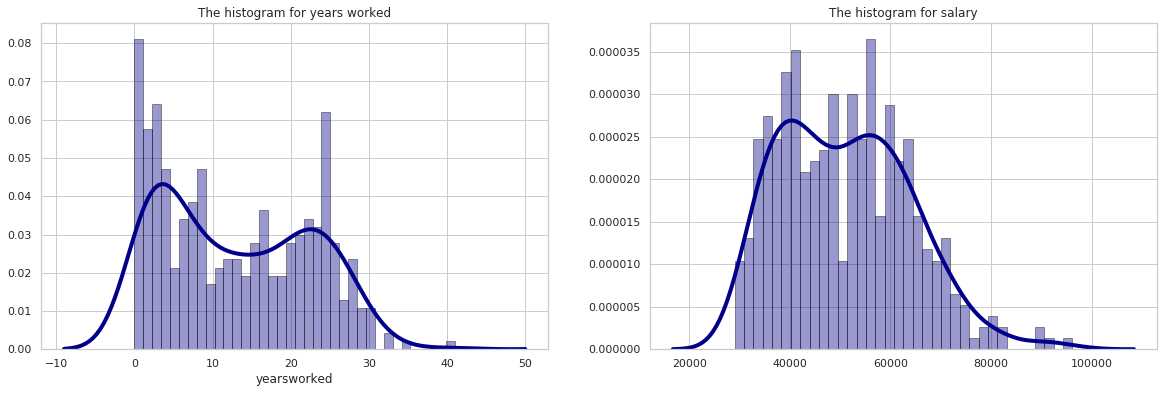

In [13]:
#Creating histograms with density line

sns.set()
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2,figsize=(20, 6))
sns.distplot(X_train["yearsworked"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0])

sns.distplot(y_train, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[1])

axes[0].set_title('The histogram for years worked')
axes[1].set_title('The histogram for salary')
plt.show()

##### Comment on distribution of the response and the feature

For salaries earned the peak of salaries is between 37000 dollars and 43000 dollars.There are potential outliers in this data. This histogram simply shows that a lot of people earn between 35000 dollars and 47000 dollars. Then only a few earn between 83000 dollars and 89000 dollars. This few is most likey to be the excutive and a lot of people are holding junior positions

## 5. Correlation
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.

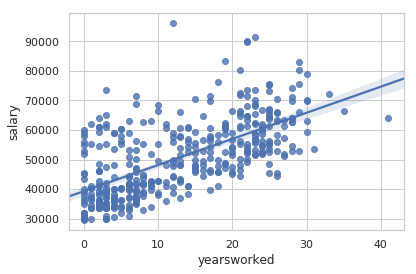

In [28]:
#Creating scatterplot


combined = pd.concat([X_train, y_train], axis=1)
combined.head()
sns.regplot(x=X_train['yearsworked'], y=y_train)
# plt.plot(X_train['yearsworked'], y_train, 'o', color='black');
# sns.lmplot(x=combined['yearsworked'],y=combined['salary'])

Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

The line of best fit shows a strong relationship between years worked and the salary earned. There are some outliers which are the furthest points from the line of best fit.

In [ ]:
#Run a simple linear regression model using statsmodels (excluding outliers)

model = smf.ols(formula = 'salary ~ yearsworked', data=X_train).fit()
# smf.ols('salary ~ yearsworked', data=X_train).fit()

model.summary()

### Interpreting correlation graph

- The above table shows the correlation between two variables, showcasing its <b>strengths and direction</b>. This helps us to select the features that have a significant impact on the response variable and therefore helping us predict the salaries.

- looking at the correlation between the response variable Salary and the feature variable yearsworked which is <b>0.623589</b>. This is a <b> fairly strong positive relationship </b>, and therefore we can assume as the number of years worked increases the value of salary also increases.

## Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.
## What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked



In [ ]:
model.rquared

R^2

What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?
It reveals that about 37% of the data fit the regression model.

overall significance

# interpret coefficient of Years Worked and Salary

The coefficient of 827.1461 means that as the yerasworked variable increases by 1 year, the predicted value of salaries increases by 827.1461 dollars, i.e using units of the observed values to see the relationship.

#### answer

What do the 95% confidence intervals [0.025, 0.975] mean?

A 95% confidence interval is a range of values that you can be 95% certain that it contains the true mean of the population. Idealy, with regards to the interval,the true population mean value should be on that interval. If a confidence interval does not include a particular value, we can say that it is not likely that the particular value is the true population mean. However, even if a particular value is within the interval, we shouldn't conclude that the population mean equals that specific value.

The confidence interval can also be used for coefficients of the regression model Use the confidence interval to assess the estimate of the population coefficient for each term in the model.

The coefficient for the years worked is 827.1461. The 95% confidence interval is [714.150,940.143]. The coefficient falls on the interval. You can be 95% confident that the confidence interval contains the value of the coefficient for the population.

The same applies for the constant coefficient.

In [ ]:
#Calculate expected salary for someone who worked for 12 years

experience = pd.DataFrame({'yearsworked':[12]})
predict_salary=model1.predict(experience)
p=predict_salary.iloc[0]
print('The expected salary of a person with 12 years experience is:',p,'dollars')

In [ ]:
#Calculate expected salary for someone who worked for 80 years

experience = pd.DataFrame({'yearsworked':[80]})
predict_salary=model1.predict(experience)
p=predict_salary.iloc[0]
print('The expected salary of a person with 80 years experience is:',p,'dollars')

#### answer
Are there any problems with this prediction? If so, what are they?


There were no problems to make this prediction which is a concern because 80 years of experince is a rare value prediction in this Regression. What does this mean for the predictive model?

#### feature selection
We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?


By the correlation map shown in the beginning, the feature that has a good correlation with salary, which is even better than the years worked is position. Years worked at current rank also has a good correlation with salary. The rest of the features have less than 50% correlation with salary. It would not make sense to build a model with features that have no or a very weak relationship with salary

In [ ]:
#fitting model

predicted1=model1.predict(x_test)
predict = pd.DataFrame(predicted1,columns =['Predicted salary'])
result = pd.concat([y_test, predict], axis=1, sort=False)

How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?